# Lab | Regression Analysis

### Import libraries here:

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import statsmodels.api as sm

# Challenge 1
- I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. 
- In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

## Creating dataframe
Use this command to create the dataframe.
```python
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
```

In [2]:
# Your code here
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

## Plot your data
- Use  `sns.scatterplot` to plot `Age` vs `Tardies` 

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

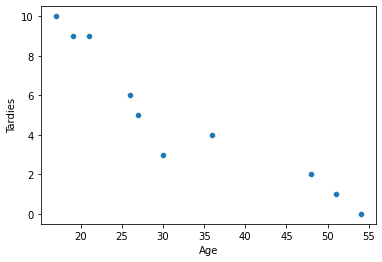

In [3]:
# Your code here
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])

- You can also use `sns.pairplot()`.
- This plot the pairwise relationships in a dataset.

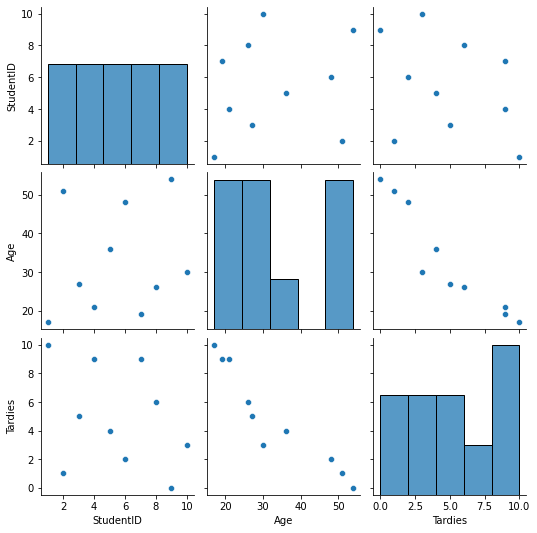

In [4]:
# Your code here
sns.pairplot(student_data)

- Do you see a trend?
- Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your answer here


## Covariance and correlation

- Calculate the covariance and correlation of the variables. 
- Use `.cov()` and  `.corr()`.
- What is the difference between these two measures?

In [5]:
# Your code here
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [6]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


## Linear regression

- Build a linear regression model for this data. 
- You can use scikit-learn library.
```python
from sklearn.linear_model import LinearRegression
```

### Select variables
- Select you `X` and `y` variables.
- `X` will be your independent variable. **"Age"**
- `y` will be your dependent variable. **"Tardies"**

In [27]:
# Your code here
from sklearn.linear_model import LinearRegression
X = student_data[['Age']]
Y = student_data['Tardies']

### Train and test
- Split the data into train and test:
- `X_train`, `X_test`, `y_train`, `y_test`

In [44]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

### Modeling
- Instantiate the LinearRegression class

In [45]:
# Your code here
model = LinearRegression()

### Fit the model 
- Fit the model, the algorithm will learn about the data pattern

In [46]:
# Your code here
model.fit(X_train,Y_train)

LinearRegression()

### Prediction
- Predict the y_test that we splitted.
- Save in a variable called `y_pred_test`

In [47]:
# Your code here
y_pred_test = model.predict(X_test)
y_pred_test

array([1.3697479 , 5.72605042, 4.27394958, 8.87226891])

In [48]:
Y_test

5     2
9     3
4     4
0    10
Name: Tardies, dtype: int64

### Evaluate (test)
- Use the metrics below to evaluate your model and predict data.
- Use the y_test and y_pred_test
```python
from sklearn.metrics import mean_squared_error, r2_score
```

In [49]:
# Your code here
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y_test,y_pred_test)

2.2938485982628336

In [50]:
r2_score(Y_test,y_pred_test)

0.7632156285664171

### Coefficient and intercept
- Use `model.coef_` and `model.intercept_` to return both values.
- Can you interpret the values?

In [53]:
# Your code here
model.coef_

array([-0.24201681])

In [52]:
model.intercept_

12.98655462184874

- This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables
- coefficient of -0.24: it means that for every unit of change in X (age), the change in y (tardie) is about 24% in a negative direction. 
- In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

### Visualize the results
- Use the model that you created to predict the tardies. You will use `X`
- Include predictable tardies into the dataframe.

In [57]:
# Your code here
student_data['pred_tardies']= model.predict(X)
y_pred=student_data['pred_tardies']
student_data

,StudentID,Age,Tardies,pred_tardies
0,1,17,10,8.872269
1,2,51,1,0.643697
2,3,27,5,6.452101
3,4,21,9,7.904202
4,5,36,4,4.273950
5,6,48,2,1.369748
6,7,19,9,8.388235
7,8,26,6,6.694118
8,9,54,0,-0.082353
9,10,30,3,5.726050


### Plot
- You can use the code below:
- Add the ticks and labels.
```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

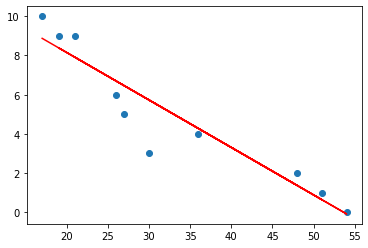

In [58]:
# Your code here
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

_______________________________________

# Challenge 2

- In this challenge you will use `vehicles.csv` dataset.
- This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions.
- The goal of this exercise is to predict `vehicles CO2 emissions` based on several independent variables. 

### Read csv file

In [59]:
# Your code here
df_vehicles = pd.read_csv('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Data/Data_M02-L11-linear_regression/vehicles.csv')
df_vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Correlations
- Use the variables `Year`, `Cylinders`, `Fuel Barrels/Year`, `Combined MPG`, and `Fuel Cost/Year`.
- Plot the pairwise relationships between columns. You can use `sns.pairplot()`
- Calculate the correlations between each of these variables and the outcome. You can use `.corr()`.
- Analyze which variable is the most important in determining `CO2 Emission Grams/Mile`

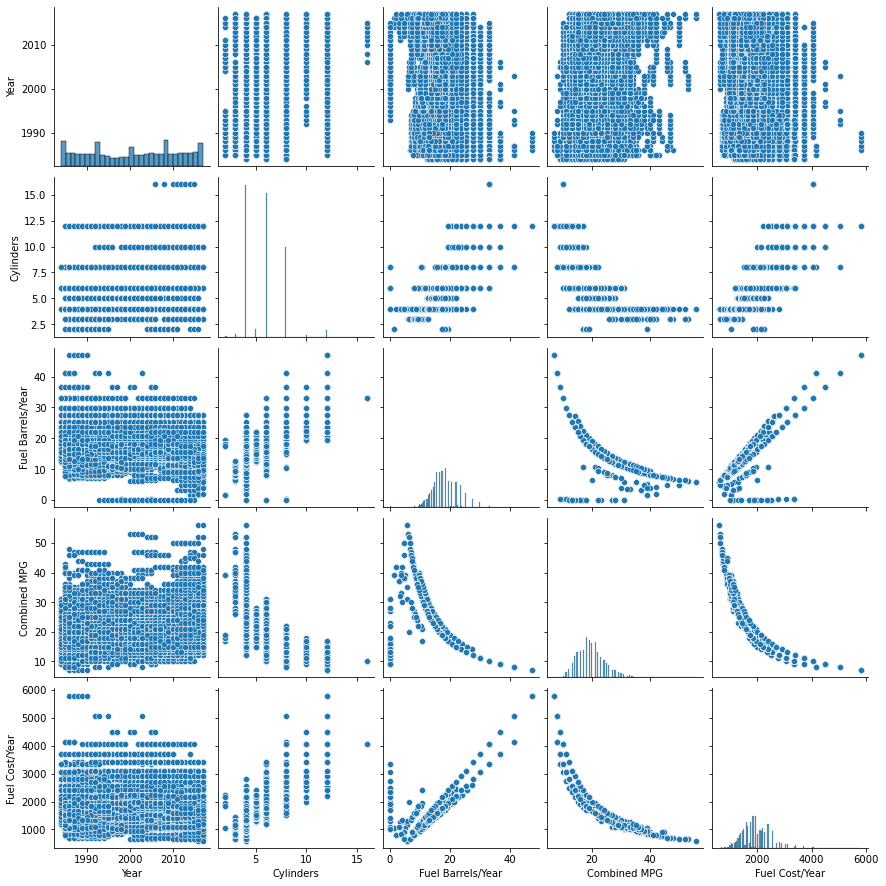

In [63]:
# Your code here
df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
sns.pairplot(df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

In [64]:
df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


### Linear regression
- Build a linear regression to predict the `CO2 Emission Grams/Mile`

In [84]:
# Your code here
X = df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
Y = df_vehicles['CO2 Emission Grams/Mile']
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
model.fit(X_train,Y_train)

LinearRegression()

### Predicting (X_test)

In [85]:
# Your code here
y_pred_test = model.predict(X_test)
y_pred_test

array([516.40013002, 285.10434128, 570.28892026, ..., 445.24059077,
       369.17020073, 378.51523223])

### Evaluate
- Use `mean_squared_error()` and `r2_score()`.
- Use variables `y_test` and `y_pred`

In [86]:
# Your code here
mean_squared_error(Y_test,y_pred_test)

269.4269655313063

In [87]:
r2_score(Y_test,y_pred_test)

0.9808197906180259

In [80]:
df_vehicles['pred_CO2']= model.predict(X)
y_pred=df_vehicles['pred_CO2']
df_vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,pred_CO2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,521.943198
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,669.915997
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,552.425232
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,669.564962
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,571.753683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,229.246516
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100,228.895481
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,228.544447
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100,228.193412
